# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
api = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

In [ ]:
# loop through each city and query the api for city information
# store each city in a temporary dictionary for processing later
temp = {}
counter = 0
for city in cities:
    counter += 1
    print(f'{counter}) - {city}')
    response = requests.get(api + city).json()
    temp[city] = response
    if ( (counter >= 60) & (counter % 60 == 0) ):
        time.sleep(60)

In [ ]:
# clean up list of cities and remove all not found results

#cuidades = { city: data for (city, data) in temp.items() if data['cod'] == 200}
cuidades = {}

for (city, data) in temp.items():
    if data['cod'] == 200:
        cuidades[city] = {
            'id'            : data['id'],
            'name'          : data['name'],
            'feels_like'    : data['main']['feels_like'],
            'humidity'      : data['main']['humidity'],
            'pressure'      : data['main']['pressure'],
            'temperature'   : data['main']['temp'],
            'temp_max'      : data['main']['temp_max'],
            'temp_min'      : data['main']['temp_min'],
            'weather'       : data['weather'][0]['description'],
            'wind_speed'    : data['wind']['speed'],
            'datetime'      : data['dt'],
            'timezone'      : data['timezone'],
            'country'       : data['sys']['country'],
            'sunrise'       : data['sys']['sunrise'],
            'sunset'        : data['sys']['sunset'],
            'latitude'      : data['coord']['lat'],
            'longitud'      : data['coord']['lon'],
            'clouds'        : data['clouds']['all']
        }


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# create dataframe from values
cities_df = pd.DataFrame(cuidades.values())

# check and display dataframe
print(cities_df.shape)
cities_df.head(5)

In [ ]:
# export DataFrame to CSV file
cities_df.to_csv('data/cities.csv', index=False, header=True, encoding='utf-8')
del cities_df

### Load CSV to DataFrame

In [2]:
# read CSV file to DataFrame
cities_df = pd.read_csv('data/cities.csv', encoding='utf-8', low_memory=False)

cities_df = cities_df.rename(columns={ 'lat': 'latitude', 'lon': 'longitude', 'temp': 'temperature' })

# check dataframe
print(cities_df.shape)
cities_df.head(2)

(569, 17)


,id,name,feels_like,humidity,pressure,temperature,temp_max,temp_min,weather,wind_speed,timezone,country,sunrise,sunset,latitude,longitude,clouds
0,946128,eMkhomazi,296.50,75,1016,294.53,295.37,293.71,light rain,0.45,7200,ZA,1585714050,1585756400,-30.21,30.80,58
1,1015776,Bredasdorp,287.14,68,1024,289.77,291.15,288.15,few clouds,4.10,7200,ZA,1585716742,1585758872,-34.53,20.04,24


In [171]:
# check for duplicates
cities_df.duplicated().value_counts()

False    569
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [3]:
# get bounding box boundaries
BBox = ((cities_df.longitude.min(),   cities_df.longitude.max(),      
         cities_df.latitude.min(), cities_df.latitude.max()))
BBox

(-179.17, 178.42, -54.8, 78.22)

#### Latitude vs. Temperature Plot

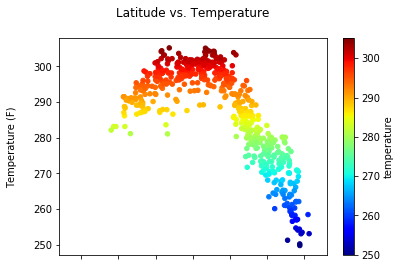

In [89]:
cities_df.plot(kind='scatter', 
               x='latitude', 
               y='temperature', 
               title='Latitude vs. Temperature\n', 
               c='temperature', 
               cmap='jet')

x = 90

plt.ylabel('Temperature (F)\n')
plt.xlabel('Latitude\n')
plt.xlim(-x,x)

# display chart
plt.show()

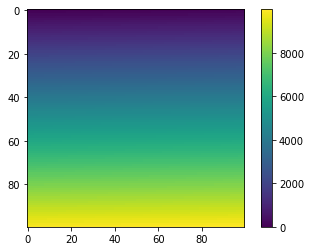

In [5]:
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

#### Latitude vs. Humidity Plot

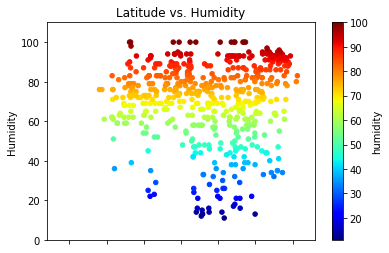

In [91]:
cities_df.plot(kind='scatter', 
               x='latitude', 
               y='humidity', 
               title='Latitude vs. Humidity', 
               c='humidity', 
               cmap='jet')

x = 90

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.xlim(-x,x)
plt.ylim(0,110)

# display chart
plt.show()

#### Latitude vs. Cloudiness Plot

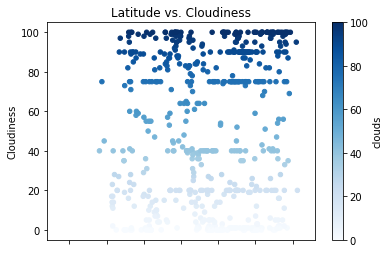

In [93]:
cities_df.plot(kind='scatter', 
               x='latitude', 
               y='clouds', 
               title='Latitude vs. Cloudiness', 
               c='clouds', 
               cmap='Blues')

x = 90

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.xlim(-x,x)

# display chart
plt.show()

#### Latitude vs. Wind Speed Plot

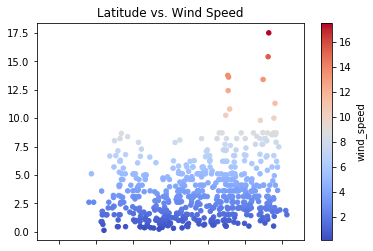

In [184]:
cities_df.plot(kind='scatter', 
               x='latitude', 
               y='wind_speed', 
               title='Latitude vs. Wind Speed', 
               c='wind_speed', 
               cmap='coolwarm')

x = 90

plt.ylabel('')
plt.xlabel('Latitude')
plt.xlim(-x,x)

# display chart
plt.show()

## Linear Regression

In [122]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_regression_line(x, 
                         y, 
                         title='', 
                         ylabel='', 
                         cmap='coolwarm', 
                         line='red',
                         output=''
                        ):
    
    # calculating linear regression
    slope, intercept, r_value, p_value, stderr  = linregress(x, y)
    rsq_value   = round(r_value**2,2)
    #print('Estimated coefficients:\nintercept = {} \nslope = {}'.format(intercept, slope))
    
    # predicted response vector
    y_pred = intercept + slope*x
    
    # plotting the points as per dataset on a graph
    plt.scatter(x, y, c=x, cmap=cmap)
    
    # set title
    plt.title(title + '\n')
    
    # plotting the regression line
    plt.plot(x, y_pred, color=line)
    line_eq     = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_eq, (0,10), fontsize = 15, color='r')
    
    # putting labels for x and y axis
    plt.xlabel(f'\nThe r-squared value is: {rsq_value}')
    plt.ylabel(ylabel + '\n')
    
    # function to show plotted group
    plt.show()

In [137]:
# Create Northern and Southern Hemisphere DataFrames
cond1 = (cities_df['latitude'] >= 0)
north = cities_df[cond1]

cond2 = (cities_df['latitude'] < 0)
south = cities_df[cond2]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

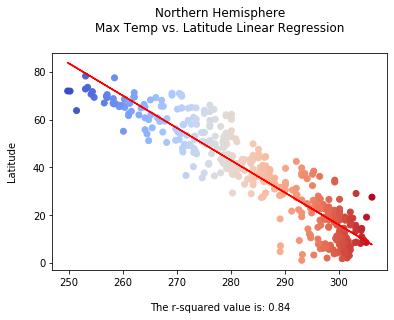

In [138]:
# generate regression line plot
plot_regression_line(north['temp_max'], 
                     north['latitude'], 
                     ylabel='Latitude',
                     title='Northern Hemisphere\nMax Temp vs. Latitude Linear Regression',
                     cmap='coolwarm'
                     #output='north_max_temp_lat.png'
                    )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

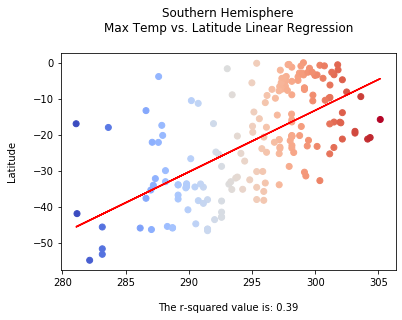

In [139]:
# generate regression line plot
plot_regression_line(south['temp_max'], 
        south['latitude'], 
        ylabel='Latitude', 
        title='Southern Hemisphere\nMax Temp vs. Latitude Linear Regression',
        cmap='coolwarm'
        #output='south_max_temp_lat.png'
       )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

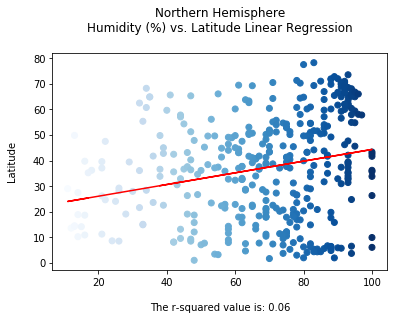

In [140]:
# generate regression line plot
plot_regression_line(north['humidity'], 
                     north['latitude'], 
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nHumidity (%) vs. Latitude Linear Regression',
                     cmap='Blues'
                     #output='north_humidity_lat.png'
                    )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

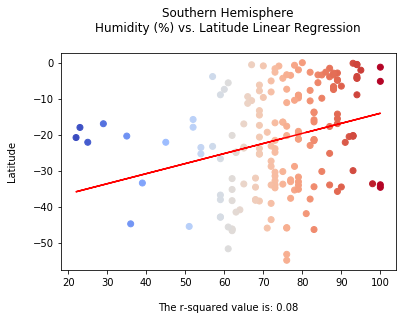

In [141]:
# generate regression line plot
plot_regression_line(south['humidity'], 
                     south['latitude'], 
                     ylabel='Latitude', 
                     title='Southern Hemisphere\nHumidity (%) vs. Latitude Linear Regression',
                     cmap='coolwarm'
                     #output='south_humidity_lat.png'
                    )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

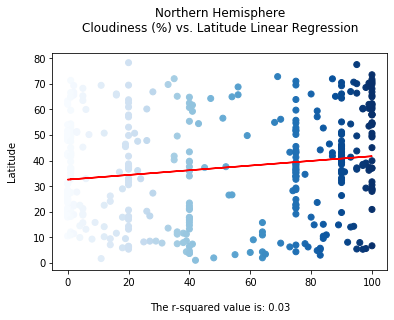

In [142]:
# generate regression line plot
plot_regression_line(north['clouds'], 
                     north['latitude'], 
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nCloudiness (%) vs. Latitude Linear Regression',
                     cmap='Blues'
                     #output='north_cloudiness_lat.png'
                    )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

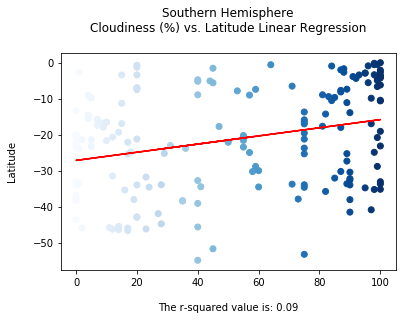

In [143]:
# generate regression line plot
plot_regression_line(south['clouds'], 
                     south['latitude'], 
                     ylabel='Latitude', 
                     title='Southern Hemisphere\nCloudiness (%) vs. Latitude Linear Regression',
                     cmap='Blues'
                     #output='south_cloudiness_lat.png'
                    )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

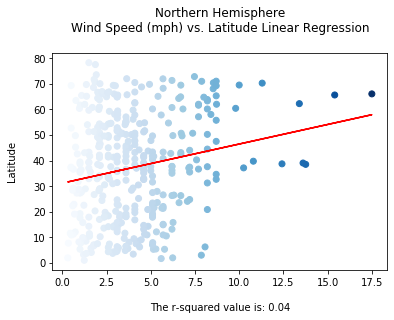

In [144]:
# generate regression line plot
plot_regression_line(north['wind_speed'], 
                     north['latitude'], 
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nWind Speed (mph) vs. Latitude Linear Regression',
                     cmap='Blues'
                     #output='north_wind_speed_lat.png'
                    )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

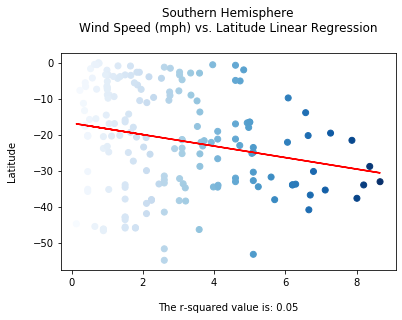

In [145]:
# generate regression line plot
plot_regression_line(south['wind_speed'], 
                     south['latitude'], 
                     ylabel='Latitude', 
                     title='Southern Hemisphere\nWind Speed (mph) vs. Latitude Linear Regression',
                     cmap='Blues'
                     #output='south_wind_speed_lat.png'
                    )